# Data Science Summer Intern assignment 2021

*Assignment for candidates**

This is a mandatory assignment for everyone applying for the data science internship. Please return your answers along with your application.

## Overview

Thank you for applying for Wolt's 2021 Data Science Internship! The idea is not to spend an extensive amount of time on this, but to show how you think and approach problems.

There are two parts to this assignment: first, you get to pick a dataset, explore it and prepare a couple of models based on it. Secondly, we'll take a look at your academic and extracurricular interests.

Present your answers in a reproducible way in an open format. Make sure you include the code and your reasoning, too. It pays to have a proper idea of Wolt's product and business, so it might be a good idea to take a look at our blog or some of the recent articles around the web.

There are many ways to successfully complete this assignment. Make sure the person reading the document you produce understands why you made the choices you made. If you have a unique approach and the right set of skills, this will be your chance to set yourself apart and shine!

## Choosing the data
We have prepared a couple of options for you. Feel free to choose which data you use based on your background and ambitions. You only need to choose one.

* **Time series.** Consider the flow of orders in the attached file as a process fluctuating in time.
* **Routing.** Every order in the attached file has a pick-up and a drop-off location, and they are connected via a route on a map. OpenStreetMap has the suitable map data, and you can use tools such as OSMnx and NetworkX to utilize it.
* **Image processing.** Select a freely available food image classification dataset. For inspiration, take a look at https://github.com/ivanDonadello/Food-Categories-Classification or Kaggle. A suitable dataset for this task will have category labels associated with pictures of food.

You don't have to limit your choices to these, and you can also freely combine and enrich datasets.

## Choosing the approach
Armed with a dataset, come up with a modeling task that is relevant to Wolt. To give you an idea what we are looking for, the task might look something like these:

* How many orders are we going to get tomorrow? Or next week?
* Where will the orders be delivered in an hour?
* Routing will obviously affect the total delivery time. Are there some routes or route segments that should be avoided at certain times? * How well does the route explain the delivery time?
* Not all dishes listed on Wolt have all the ingredients listed, but we have pictures of most dishes. Can we try to recommend only vegan dishes to vegans, based on the associated images?
* …and so on!

The minimum requirement is that your approach will result in some kind of predictive model. Choose a task that properly showcases your skills!

## Working with the data
### Exploration
Produce interesting statistics and graphs about the dataset. Show the most important features and explain what you see. 

### Modeling
Why did you choose the approach, what kind of benefits do you see in solving it? What kind of metrics can you use to evaluate how good the solution is?

Based on the approach you choose, produce a model suitable for the task. You should include the preparation work, feature engineering and your thought process in your answer. 

### Evaluation
Are you happy with the results? What kind of results would you expect to see, if this was deployed to production?

### Further development
Make slight modifications to the model or take a completely different method to solve it. Compare your two solutions. Strengths, weaknesses? What should you consider when you compare different models? If you had more time and resources, what kind of development could be done to make the solution better?

## Your background and Wolt
After the practical work, let's discuss what you have learned and what your ambitions are. Write a bit about the problems you like to work with. Have you written your thesis or a larger piece of coursework about something that you would see beneficial for Wolt? If you already have work history, are there some things that you would like to try here? Based on your knowledge about us, are there some problems you would like to help us solve? Do you have some relevant, interesting minors or side projects? We are always interested in enthusiastic people with fresh ideas, and this could be the opportunity to put something you recently learned into use!



# 1. Data exploration 

In [114]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import calendar
from sklearn.impute import SimpleImputer
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import sklearn.tree as tree
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, balanced_accuracy_score,  plot_roc_curve, make_scorer, roc_curve

In [7]:
data = pd.read_csv('orders_autumn_2020.csv')

In [8]:
data.head()

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18706 entries, 0 to 18705
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TIMESTAMP                                             18706 non-null  object 
 1   ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES  18706 non-null  int64  
 2   ITEM_COUNT                                            18706 non-null  int64  
 3   USER_LAT                                              18706 non-null  float64
 4   USER_LONG                                             18706 non-null  float64
 5   VENUE_LAT                                             18706 non-null  float64
 6   VENUE_LONG                                            18706 non-null  float64
 7   ESTIMATED_DELIVERY_MINUTES                            18706 non-null  int64  
 8   ACTUAL_DELIVERY_MINUTES                               18

In [18]:
data.describe()

,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
count,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18429.000000,18429.000000,18429.000000,18706.000000
mean,-1.201058,2.688228,60.175234,24.941244,60.175643,24.941214,33.809313,32.608254,11.996853,16.973536,3.790991,0.332756
std,8.979834,1.886455,0.012674,0.016540,0.011509,0.014482,7.340283,10.018879,23.812605,3.411900,1.456017,1.129234
min,-41.000000,1.000000,60.153000,24.909000,60.149000,24.878000,10.000000,6.000000,0.000000,6.100000,0.077419,0.000000
25%,-7.000000,1.000000,60.163000,24.926000,60.167000,24.930000,28.000000,25.000000,0.000000,14.400000,2.696190,0.000000
50%,-2.000000,2.000000,60.175000,24.943000,60.170000,24.941000,33.000000,32.000000,0.000000,16.700000,3.631970,0.000000
75%,5.000000,4.000000,60.186000,24.954000,60.186000,24.950000,38.000000,40.000000,25.000000,18.900000,4.692530,0.000000
max,34.000000,11.000000,60.201000,24.980000,60.219000,25.042000,82.000000,58.000000,100.000000,26.700000,9.857300,6.315790


In [49]:
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])

In [129]:
data['weekday'] = data['TIMESTAMP'].dt.weekday
data['DATE'] = data['TIMESTAMP'].dt.date

In [130]:
mean_per_day = data.groupby('DATE').mean()

Text(0.5, 1.0, 'Daily Mean of Item Delivered')

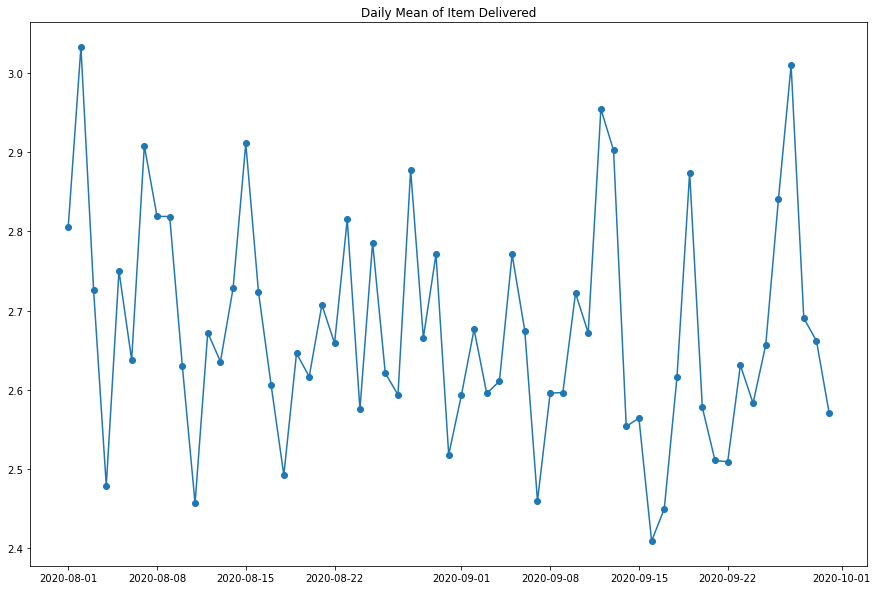

In [131]:
fig=plt.figure(figsize=(15, 10))
plt.plot_date(mean_per_day.index, mean_per_day['ITEM_COUNT'], linestyle='-')
plt.title('Daily Mean of Item Delivered')

In [137]:
fig=plt.figure(figsize=(15, 10))
plt.plot(mean_per_day.index, mean_per_day['PRECIPITATION'],'-o', c=mean_per_day['weekday'])
plt.title('Daily Mean of Precipitation')

Text(0.5, 1.0, 'Daily Mean of Precipitation')

ValueError: RGBA sequence should have length 3 or 4

<Figure size 1080x720 with 1 Axes>

In [132]:
mean_per_day

,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,weekday
DATE,,,,,,,,,,,,,
2020-08-01,-0.515050,2.806020,60.175656,24.940542,60.175860,24.941134,30.658863,30.143813,5.769231,18.773244,2.451263,0.000000,5.0
2020-08-02,3.332317,3.033537,60.175235,24.940817,60.175762,24.941488,34.509146,37.841463,10.259146,19.196341,4.777104,0.780809,6.0
2020-08-03,0.163717,2.725664,60.174363,24.941283,60.175690,24.940602,35.327434,35.491150,15.707965,17.880531,4.706736,0.729390,0.0
2020-08-04,-0.793860,2.478070,60.175504,24.941794,60.175899,24.940654,33.061404,32.267544,14.692982,16.972368,2.131851,0.735457,1.0
2020-08-05,-1.832031,2.750000,60.173941,24.941730,60.175262,24.941520,33.414062,31.582031,11.406250,19.648437,3.954401,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,-2.505495,2.840659,60.176327,24.944247,60.176824,24.941473,31.859890,29.354396,0.000000,16.175549,3.616059,0.000000,5.0
2020-09-27,-1.696891,3.010363,60.175435,24.942189,60.176109,24.941487,32.044041,30.347150,0.000000,17.855181,4.321162,0.000000,6.0
2020-09-28,-2.728873,2.690141,60.175475,24.941028,60.176067,24.942208,32.584507,29.855634,2.288732,14.988732,3.837791,0.000000,0.0


0        5
1        5
2        5
3        5
4        5
        ..
18701    2
18702    2
18703    2
18704    2
18705    2
Name: TIMESTAMP, Length: 18706, dtype: int64